# Retention rate

Indicates how many customers we retain over specific time window. 

[sample data source](https://www.kaggle.com/vijayuv/onlineretail)

[ref article toward data science](https://towardsdatascience.com/data-driven-growth-with-python-part-1-know-your-metrics-812781e66a5b)

Retention rate should be monitored very closely because it indicates how sticky is your service and how well your product fits the market. For making Monthly Retention Rate visualized, we need to calculate how many customers retained from previous month.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# data cleaning
df = pd.read_csv('OnlineRetail.csv', 
                 encoding= 'unicode_escape', 
                 dtype = {'CustomerID': 'str'}) 
df = df[df.Country == 'France']
df['InvoiceYearMonth'] = pd.to_datetime(df['InvoiceDate']).dt.strftime("%Y%m")
df['Revenue'] = df.Quantity * df.UnitPrice
df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583,France,201012,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583,France,201012,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583,France,201012,45.0


In [3]:
# customer revenue per month
df_rev = df.groupby(['CustomerID','InvoiceYearMonth'])[['Revenue']].sum().reset_index()
df_rev.head(3)

,CustomerID,InvoiceYearMonth,Revenue
0,12413,201101,415.30
1,12413,201104,84.65
2,12413,201110,194.20


In [4]:
# if customer has perchase in that month
df_custmonth = pd.crosstab(df_rev['CustomerID'], df_rev['InvoiceYearMonth']).reset_index()
df_custmonth.head(3)

InvoiceYearMonth,CustomerID,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,12413,0,1,0,0,1,0,0,0,0,0,1,0,0
1,12437,0,1,1,1,1,1,1,0,0,1,1,1,1
2,12441,1,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
prev_m = '201012' #first month
ret_month = df_custmonth.columns[2:]#all the months columns (from the 2nd month), first month didn't have previous month
retention = list()
for m in ret_month: #all the months columns (from the 2nd month)
    total_prev = df_custmonth[prev_m].sum()
    total_retain = df_custmonth[(df_custmonth[prev_m] > 0) & (df_custmonth[m] > 0)][m].sum()
    retention = retention + [round(total_retain / total_prev, 2)]
    prev_m = m

In [6]:
df_retention = pd.DataFrame({'month': ret_month,'retention_rate': retention})
df_retention.head(3)

,month,retention_rate
0,201101,0.53
1,201102,0.32
2,201103,0.53


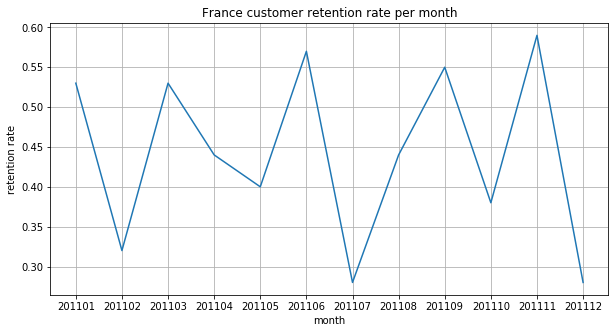

In [7]:
plt.figure(figsize=(10,5))
plt.xlabel('month')
plt.ylabel('retention rate')
plt.title('France customer retention rate per month')
plt.grid(True)
plt.plot(df_retention.month, df_retention.retention_rate)

#plt.savefig("test.png")
#plt.show()